In [1]:
import numpy as np

from matplotlib import pyplot as plt

from snn.graphs import plot_network
from snn.resonator import create_excitatory_inhibitory_resonator, test_resonator_on_chirp


In [5]:
from utils import copy_filter_hp_to_other_clock_frequency

# copy_filter_hp_to_other_clock_frequency(1536000, 15360)

In [38]:
def resonator_output_spikes_on_chirp(
        freq0,
        clk_freq,
        save_figure=False,
        neurons_log_potentials=None,
        neurons_log_spikes=None
):
    my_resonator = create_excitatory_inhibitory_resonator(freq0=freq0, clk_freq=clk_freq)
    neurons_log_potentials = neurons_log_potentials or []
    for i in neurons_log_potentials:
        my_resonator.log_membrane_potential(i)

    neurons_log_spikes = neurons_log_spikes or []
    for i in neurons_log_spikes:
        my_resonator.log_out_spikes(i)

    start_freq = 0
    spectrum = 2 * float(freq0)
    test_size = int(spectrum * clk_freq)
    spikes_neuron = my_resonator.neurons[-1]

    spikes_neuron.membrane_sample_max_window = np.zeros(1).astype('float32')
    test_resonator_on_chirp(
        my_resonator,
        start_freq=start_freq,
        step=1/clk_freq,
        test_size=test_size,
        clk_freq=clk_freq
    )

    for i in neurons_log_potentials:
        spikes_neuron = my_resonator.neurons[i]
        membrane_neuron = my_resonator.neurons[i]
        y_membrane = membrane_neuron.membrane_potential_graph()
        x = np.linspace(start_freq, start_freq + spectrum, len(y_membrane))
        plt.title(f'membrane potential f={freq0}, neuron={i}')
        plt.plot(x, y_membrane)
        plt.show()

    for i in neurons_log_spikes:
        spikes_neuron = my_resonator.neurons[i]
        y_events = spikes_neuron.out_spikes()
        y_spikes = np.zeros(y_events[-1] + 1)
        y_spikes[y_events] = 1
        spikes_window_size = clk_freq//10
        y_spikes = np.convolve(y_spikes, np.ones(spikes_window_size, dtype=int), 'valid')
        x = np.linspace(start_freq, start_freq + spectrum, len(y_spikes))
        plt.title(f'spikes in window of {spikes_window_size} freq: {freq0}')
        if save_figure:
            plt.savefig('plot.png', dpi=300, bbox_inches='tight')
            plt.close()
        else:
            plt.plot(x, y_spikes)
            plt.show()

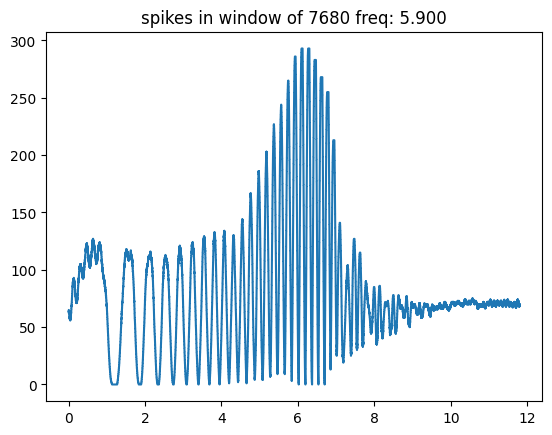

In [25]:
resonator_output_spikes_on_chirp(freq0='5.900', clk_freq=76800, neurons_log_spikes=[-1])

In [32]:
def plot_resonator_on_freq(signal_freq, clk_freq, resonator_freq, duration=2, show=True, weights=None, neurons_log_spikes=None):
    my_resonator = create_excitatory_inhibitory_resonator(freq0=resonator_freq, clk_freq=clk_freq)
    steps = clk_freq

    neurons_log_spikes = neurons_log_spikes or []
    for i in neurons_log_spikes:
        my_resonator.log_out_spikes(i)

    spectrum = duration * float(resonator_freq)
    if type(signal_freq) is not list:
        signal_freq = [signal_freq]

    weights = weights or np.ones(len(signal_freq))

    x = np.linspace(0, spectrum, int(spectrum * steps))
    t = x * 2 * np.pi * signal_freq[0]
    sine_wave = np.sin(t) * weights[0]
    for w, f in zip(weights[1:], signal_freq[1:]):
        t = x * 2 * np.pi * f
        sine_wave += np.sin(t) * w

    sine_wave /= np.max(sine_wave)

    my_resonator.input_full_data(np.zeros(steps * 5))
    for i in neurons_log_spikes:
        output_neuron = my_resonator.neurons[i]
        output_neuron.forget_logs()
    my_resonator.input_full_data(sine_wave)
    spikes_window_size = steps // 10

    for i in neurons_log_spikes:
        output_neuron = my_resonator.neurons[i]
        y_events = output_neuron.out_spikes()
        y_spikes = np.zeros(y_events[-1] + 1)
        y_spikes[y_events] = 1
        y_spikes = np.convolve(y_spikes, np.ones(spikes_window_size, dtype=int), 'valid')
        plt.title(f'signal freq {signal_freq}')
        plt.plot(np.linspace(0, duration, len(y_spikes)), y_spikes, label=signal_freq)

    if show:
        plt.show()

    return my_resonator

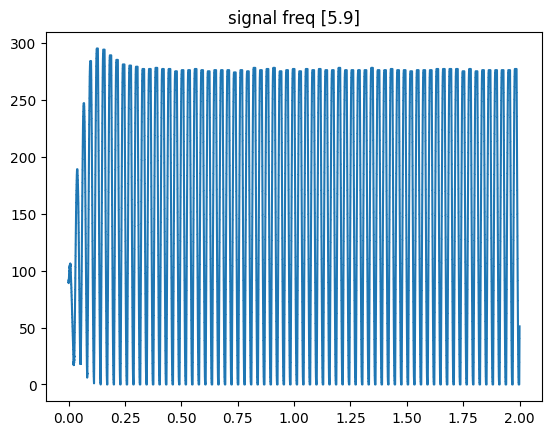

In [35]:
plot_resonator_on_freq(5.9, clk_freq=76800, resonator_freq='5.900')

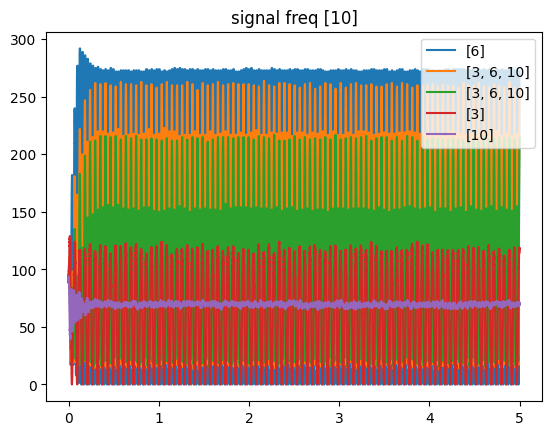

In [37]:
clk_freq = 76800
duration = 5
resonator_freq = '5.900'
plot_resonator_on_freq(6, clk_freq=clk_freq, resonator_freq=resonator_freq, duration=duration, show=False)
plot_resonator_on_freq([3, 6, 10], weights=[1, 2, 1], clk_freq=clk_freq, resonator_freq=resonator_freq, duration=duration, show=False)
plot_resonator_on_freq([3, 6, 10], weights=[1, 1, 1], clk_freq=clk_freq, resonator_freq=resonator_freq, duration=duration, show=False)
plot_resonator_on_freq(3, clk_freq=clk_freq, resonator_freq=resonator_freq, duration=duration, show=False)
plot_resonator_on_freq(10, clk_freq=clk_freq, resonator_freq=resonator_freq, duration=duration, show=False)
plt.legend(loc="upper right")
plt.show()

## Depict Phase Shifting

<string>:3: NumbaTypeSafetyWarning: unsafe cast from int64 to int32. Precision may be lost.


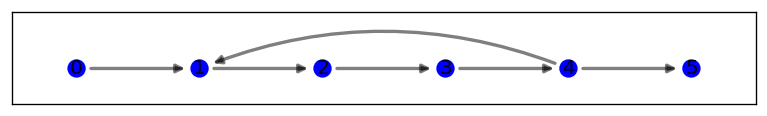

In [2]:
from snn.graphs import plot_network
from snn.resonator import create_excitatory_inhibitory_resonator, test_resonator_on_chirp, create_excitatory_resonator

my_resonator = create_excitatory_resonator(freq0='5.900', clk_freq=76800)
plot_network(my_resonator)

In [70]:
clk_freq = 76800
duration = 5
resonator_freq = '5.900'
my_resonator = create_excitatory_resonator(freq0=resonator_freq, clk_freq=clk_freq)
signal_freq = 6

neurons_log_spikes = range(6)
for i in neurons_log_spikes:
    my_resonator.log_out_spikes(i)

spectrum = duration

x = np.linspace(0, spectrum, int(duration * clk_freq))
t = x * 2 * np.pi * signal_freq
sine_wave = np.sin(t)

my_resonator.input_full_data(np.zeros(clk_freq * 5))
for i in neurons_log_spikes:
    output_neuron = my_resonator.neurons[i]
    output_neuron.forget_logs()
my_resonator.input_full_data(sine_wave)

array([17961.])

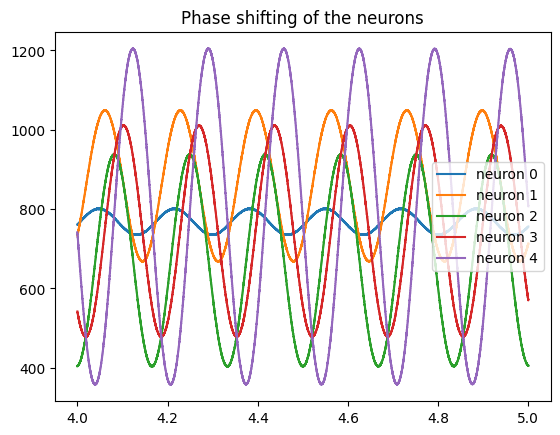

In [86]:
spikes_window_size = clk_freq // 50

for i in neurons_log_spikes[:-1]:
    output_neuron = my_resonator.neurons[i]
    y_events = output_neuron.out_spikes()
    y_spikes = np.zeros(y_events[-1] + 1)
    y_spikes[y_events] = 1
    y_spikes = np.convolve(y_spikes, np.ones(spikes_window_size, dtype=int), 'valid')
    # y_spikes -= np.mean(y_spikes)
    # y_spikes /= np.max(y_spikes)
    quarter = len(y_spikes)//duration
    y_spikes = y_spikes[-quarter:]
    plt.title(f'Phase shifting of the neurons')
    plt.plot(np.linspace(duration-1, duration, len(y_spikes)), y_spikes, label=f'neuron {i}')

plt.legend(loc='right')
plt.show()